In [3]:
%cd ..

/Users/nathanmandi/Repos/ResNetSandbox


In [16]:

import torch
import torchvision
from torch.utils.data import DataLoader
from torch.optim import SGD
from torch import nn
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor

from src.resnet.resnet18 import ResNet18
from src.training.trainer import Trainer

# Run a training loop as a simple script here,
# then replicate that functionality in training session with a config
# this script is essentially the run method of training session

# imagenet dataset
    # dataset = torch.utils.data.Dataset(torchvision.datasets.ImageNet(root="data/tiny-imagenet-200", split="train"))
    # dataset = CIFAR10(root='data/', download=True, transform=ToTensor())

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(), 
    torchvision.transforms.Resize(size=256, interpolation=torchvision.transforms.InterpolationMode.BILINEAR),
    torchvision.transforms.CenterCrop(size=224),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = torchvision.datasets.ImageFolder(
    root='data/tiny-imagenet-200/train',
    # transform=transform,
    transform=ToTensor(),
)

# dataset = torchvision.datasets.ImageFolder(root="data/tiny-imagenet-200/train", transform=ToTensor())
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)



In [17]:
# enum = enumerate(dataloader)
# _, (x, y) = next(enum)
# print(x.shape)
# print(y.shape)

torch.Size([32, 3, 64, 64])
torch.Size([32])


## Label Matching

In [43]:
import pandas as pd

all_labels_df = pd.read_csv('data/tiny-imagenet-200/words.txt', sep='\t', header=None)
ind_to_class = {v: k for k, v in dataset.class_to_idx.items()}


def get_label(label_id):
    class_str = ind_to_class[label_id]
    label = all_labels_df[all_labels_df[0] == class_str][1].values[0]
    if len(label.split(',')) > 1:
        label = label.split(',')[0]
    return label

## View some sample images

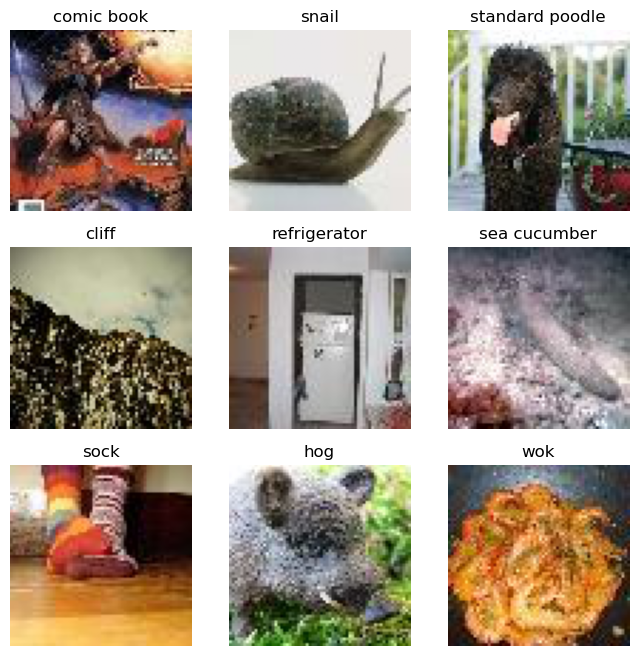

In [44]:
from matplotlib import pyplot as plt

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label_ind = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(get_label(label_ind))
    plt.axis("off")
    plt.imshow(img.squeeze().permute(1, 2, 0), cmap="gray")
plt.show()